<a href="https://colab.research.google.com/github/AaronRM9416/Food_Sales/blob/main/Food_sales_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Food_Sales 
-Aaron Musselwhite
-07/28/22

In [44]:
!pip install panda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import pandas as pd
sales = '/content/drive/MyDrive/week 1 imma snake (python)/sales_predictions.csv'

In [46]:
df = pd.read_csv(sales)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Data Cleaning



- July 28



1) How many rows and columns?

In [47]:
df.shape

(8523, 12)

2) What are the datatypes of each variable?

In [48]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) Are there duplicates? If so, drop any duplicates.

In [49]:
df.duplicated().any()

False

4) Identify missing values.

In [50]:
df.info() #finding the inconsistent columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [51]:
df.isna().sum() #singling them out  

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [52]:
df[df.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [53]:
df = df.drop(columns = ['Item_Weight','Outlet_Size']) ## I decided to drop both of these. The outlet size because it seemed unneccesary next to the types as well as lack of info to estimate or adjust them. The item weight because i do not have sufficent data to fill in those values

6) Confirm that there are no missing values after addressing them.

In [54]:
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [55]:
df['Item_Fat_Content'].value_counts() # went through every column and found which one had inconsistent names attached

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [56]:
df.replace(['LF', 'low fat'], ['Low Fat', 'Low Fat'], inplace=True) ## replaced said values here and below
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [57]:
df.replace(['reg'], ['Regular'], inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [58]:
df.info() ##checking for which columns are not objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [59]:
numb_df = df.drop(columns = [ 'Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Location_Type', 'Outlet_Type']) ##creating a new data frame with just the info i need for this question so as to not lose my original frame and to keep my data neat and in front of me

In [60]:
numb_df.info() ##double checking it worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Visibility    8523 non-null   float64
 1   Item_MRP           8523 non-null   float64
 2   Item_Outlet_Sales  8523 non-null   float64
dtypes: float64(3)
memory usage: 199.9 KB


## actual answers

In [61]:
numb_df.mean() 

Item_Visibility         0.066132
Item_MRP              140.992782
Item_Outlet_Sales    2181.288914
dtype: float64

In [62]:
numb_df.min()

Item_Visibility       0.00
Item_MRP             31.29
Item_Outlet_Sales    33.29
dtype: float64

In [63]:
numb_df.max()

Item_Visibility          0.328391
Item_MRP               266.888400
Item_Outlet_Sales    13086.964800
dtype: float64

# Visualization
##### August 3rd



In [64]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt ##importing my libraries

In [65]:
df.info() ## Identifying the usable dtypes (integers, floats, etc..)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


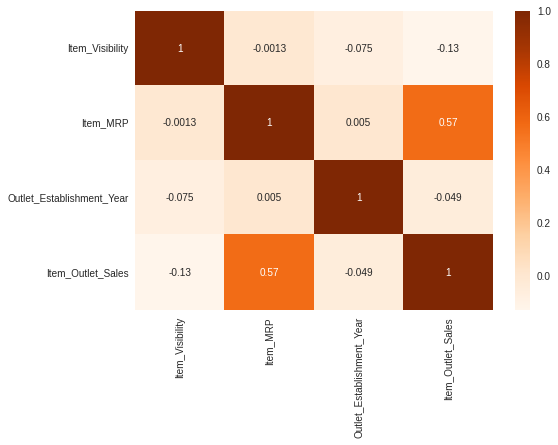

In [66]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Oranges', annot = True)   ## i made aheat map to see the correlation between the different columns

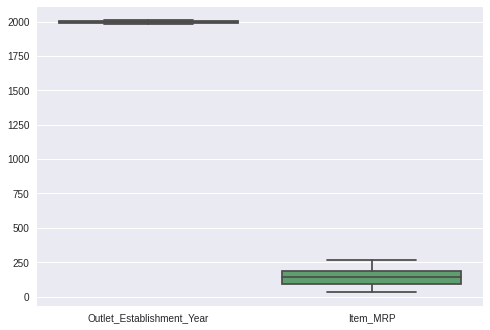

In [67]:
sns.boxplot(data= df.loc[:,['Outlet_Establishment_Year', 'Item_MRP']])  ##i chose two unrelated columns to visualize the lack of correlation

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000.]), <a list of 9 Text major ticklabel objects>)

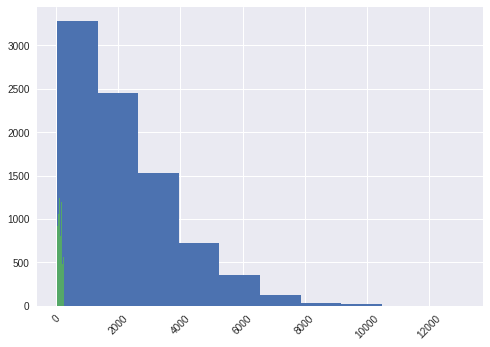

In [68]:
df['Item_Outlet_Sales'].hist()
df['Item_MRP'].hist()
plt.xticks(rotation = 45) ##comparing two moderately correlated columns via a histogram

In [69]:
Sales_Per_Year = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].nunique()
Sales_Per_Year

Outlet_Establishment_Year
1985    1183
1987     788
1997     778
1998     391
1999     785
2002     776
2004     806
2007     777
2009     779
Name: Item_Outlet_Sales, dtype: int64

In [70]:
Year_sale = np.array(Sales_Per_Year.index)
Year_sale

array([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009])

In [71]:
Sales = np.array(Sales_Per_Year.values)
Sales

array([1183,  788,  778,  391,  785,  776,  806,  777,  779])

(array([1985., 1990., 1995., 2000., 2005., 2010.]),
 <a list of 6 Text major ticklabel objects>)

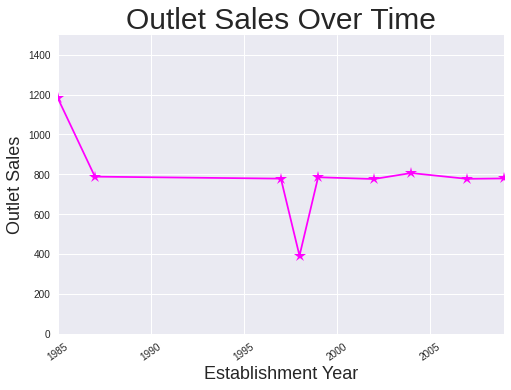

In [91]:
plt.style.use('seaborn')
plt.plot(Year_sale, Sales, c= 'magenta', marker = '*', markersize = 12)
plt.xlim(left=1985,right=2009)
plt.ylim(bottom=0,top=1500)                                                          ##i chose this plot to explore the sales over time and while there was a drop off in the mid 90s it appears as though it is fairly stagnant
plt.xlabel('Establishment Year', fontsize = 18)
plt.ylabel('Outlet Sales', fontsize = 18)
plt.title('Outlet Sales Over Time', fontsize = 30)
plt.xticks(rotation= 35)

In [73]:
IT_sales= df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
IT_sales

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 6 Text major ticklabel objects>)

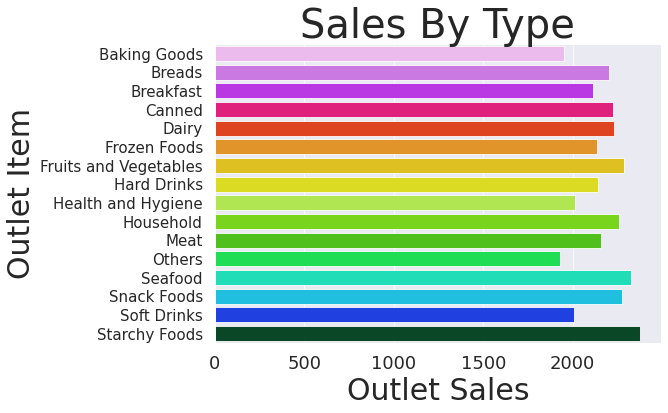

In [151]:
sns.barplot(data=df, orient= 'h', palette='gist_ncar_r', x=IT_sales.values, y=IT_sales.index,)
sns.set_theme('paper')
plt.title('Sales By Type', fontsize=40)                                            ## i wanted to give a visual look at what ypes of groceries are being sold at what rate. of course the starchy foods are at the top of the list
plt.xlabel('Outlet Sales', fontsize=30)               
plt.ylabel('Outlet Item', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(rotation = 360)                ##   <---- this is a joke

In [98]:
 Sale_by_outlet = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean()
 Sale_by_outlet

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

In [99]:
Which_teir = np.array(Sale_by_outlet.index)
Which_teir

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [106]:
Outlet_Sales = np.array(Sale_by_outlet.values)
Outlet_Sales

array([1876.90915913, 2323.99055885, 2279.62765134])

Text(0, 0.5, 'Outlet Type')

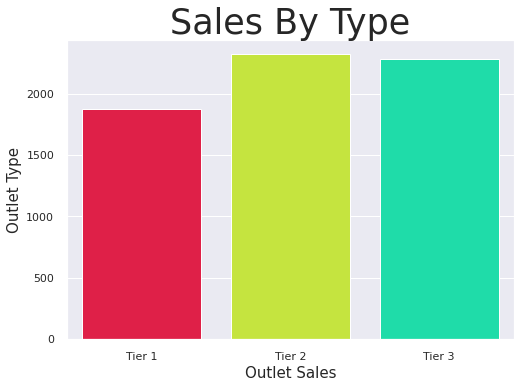

In [140]:
sns.barplot(data=df, palette ='gist_ncar_r', orient= 'v', x=Sale_by_outlet.index, y=Sale_by_outlet.values)
sns.set_theme("paper")
plt.title('Sales By Type', fontsize=35)
plt.xlabel('Outlet Sales', fontsize=15)               ## i chose this plot to determine if the type of store influenced the sales at all. It appears as though the sweet spot is at tier 2
plt.ylabel('Outlet Type', fontsize=15)